# **KNN K-vecinos más cercanos (Clasificación)**

***Ejercicio con datos sintéticos para dos características (Clasificación Multiclase)***

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 9


Se carga la base de datos Iris

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Se divide los datos en train y test:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Se estandarizan los datos (Media 0 y desviación estandar 1):

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Función para graficar las superficies de decisión:

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, xlabel=None, ylabel=None):
    """
    Plot decision regions of a classifier along with data points.

    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target labels.
    classifier (object): Classifier object with a `predict` method.
    test_idx (array-like): Indices of test samples to highlight (optional).
    resolution (float): Grid resolution for plotting (default=0.02).
    xlabel (str): Label for x-axis (default=None).
    ylabel (str): Label for y-axis (default=None).
    """

    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        selected_points = X[y == cl]
        plt.scatter(x=selected_points[:, 0],
                    y=selected_points[:, 1],
                    alpha=0.8,
                    c=colors[idx],
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # Highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='black',  # Color para los puntos de prueba
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

    # Set labels and legend
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Se combina tanto datos de test y train, solo con el objetivo de realizar el gráfico final completo.

In [4]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Se procede a entrenar usando el algoritmo de los vecinos más cercanos (kkn) definiendo los vecinos k = 5, métrica de distancia minkowski, con p = 2, osea, se convierte inmediantamente en la distancia euclidiana.

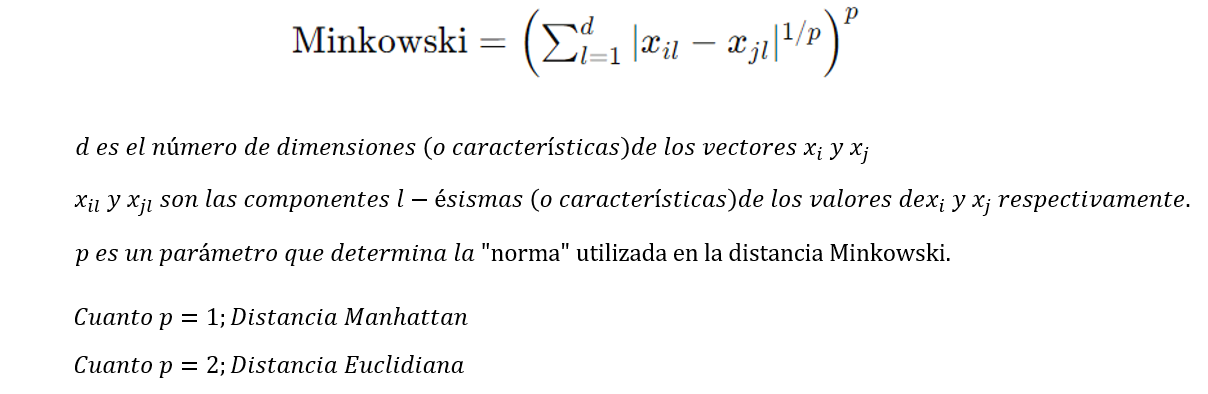

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

KNeighborsClassifier()

<ipython-input-14-d072b5d3a342>:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=selected_points[:, 0],


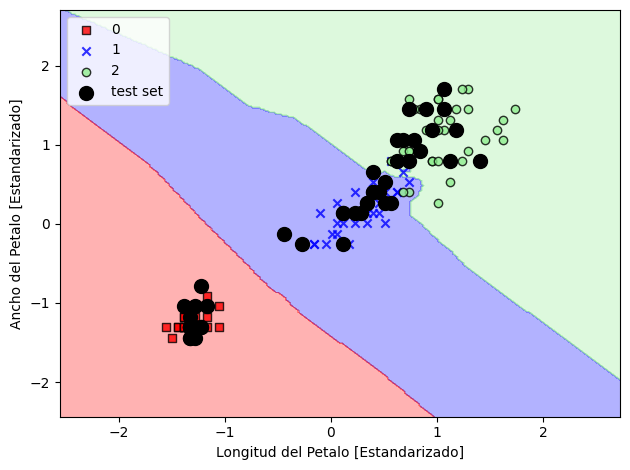

In [15]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150),
                       xlabel='Longitud del Petalo [Estandarizado]', ylabel='Ancho del Petalo [Estandarizado]')
